In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score

In [2]:
#read the data
data_path = 'out.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.282711,0.565283


In [3]:
df.drop(["Country","Region"], axis=1, inplace= True)
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,0.22,87.65,1.0,46.600000,20.340000,0.380000,0.240000,0.380000
1,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,4.42,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000
2,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,0.25,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000
3,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,15.00,75.00,2.0,22.460000,3.270000,0.150844,0.282711,0.565283
4,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,0.00,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000
223,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000
224,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000
225,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000


In [4]:
z = StandardScaler()
df = z.fit_transform(df)

In [5]:
min_points = [3, 4, 5, 6, 7]

In [6]:
def best_eps(min_points):
    for i in min_points:
        mins = i
        nn = NearestNeighbors(mins + 1)
        nn.fit(df)
        distances, neighbors = nn.kneighbors(df)
        
        # sort the distances
        distances = np.sort(distances[:, mins], axis = 0)
        #plot the distances
        distances_df = pd.DataFrame({"distances": distances,
                                     "index": list(range(0,len(distances)))})
        plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
         geom_line(color = "white", size = 2) + theme_minimal() +
         labs(title = "Elbow Method for Choosing eps") +
         theme(panel_grid_minor = element_blank(),
              rect = element_rect(fill = "#202124ff"),
              axis_text = element_text(color = "white"),
              axis_title = element_text(color = "white"),
              plot_title = element_text(color = "white"),
              panel_border = element_line(color = "darkgray"),
              plot_background = element_rect(fill = "#202124ff")
              ))
        ggsave(plot=plt, filename=f'elbow{mins}.png', dpi=300)

       # plt

In [7]:
from sklearn.cluster import DBSCAN

# dbscan and plot
db = DBSCAN(eps = 5, min_samples = 3).fit(df)
labels = db.labels_

In [8]:
# overall 
print(silhouette_score(df, labels))

0.5469354338877777


### *DBscan PCA*

In [9]:
data_path = 'new_out.csv'  #the path where you downloaded the data
pca_df = pd.read_csv(data_path)
pca_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,328128.844130,-326508.923695,-3.309734e+06,-2.077576e+06,-2.421426e+06,1.215309e+07,-1.063936e+07,-1.051696e+07,-1.144190e+07,-1.804989e+06,7.066971e+05,1.092157e+06
1,1,36965.827990,-28790.748832,-3.773167e+05,-2.446391e+05,-2.675703e+05,1.404094e+06,-1.218382e+06,-1.214092e+06,-1.314045e+06,-2.287385e+05,6.053809e+04,1.534357e+05
2,2,371024.360774,-638718.116607,-3.669449e+06,-1.963273e+06,-3.088481e+06,1.280591e+07,-1.159841e+07,-1.108031e+07,-1.231477e+07,-1.186324e+06,1.512404e+06,1.749795e+05
3,3,115.557689,1200.269494,-5.963821e+03,-1.454470e+03,-8.516649e+03,2.331486e+04,-1.960126e+04,-1.837275e+04,-2.022834e+04,-5.360080e+03,4.237827e+02,4.110561e+03
4,4,-137.802087,3486.284116,-7.460219e+03,9.626983e+02,-1.533019e+04,2.950736e+04,-2.407870e+04,-2.114888e+04,-2.383432e+04,-8.119233e+03,5.128114e+01,6.533328e+03


In [14]:
from sklearn.preprocessing import StandardScaler
 
scale= StandardScaler()

# standardization of dependent variables
scaled_data = scale.fit_transform(pca_df) 
print(scaled_data)

[[-1.72443736  0.02048269 -0.02645972 ... -0.01751665  0.02583668
   0.01536578]
 [-1.70917685 -0.21796554  0.27244869 ...  0.19099218 -0.28546072
  -0.16675833]
 [-1.69391635  0.05561202 -0.33991708 ...  0.06432137  0.41399891
  -0.16257855]
 ...
 [ 1.69391635 -0.06171431  0.0609314  ...  0.06087072 -0.06193567
  -0.05920585]
 [ 1.70917685 -0.14297154  0.09087612 ...  0.16196395 -0.07730634
  -0.17578542]
 [ 1.72443736 -0.1409051   0.14898021 ...  0.13483546 -0.15115395
  -0.12823546]]


In [15]:
db = DBSCAN(eps = 5, min_samples = 3).fit(scaled_data)
labels = db.labels_

print(silhouette_score(scaled_data, labels))

0.9470425416288006


In [19]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(mins + 1).fit(scaled_data)

distances, neighbors = nn.kneighbors(scaled_data)

distances

C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error


array([[0.00000000e+00, 5.45684066e-01, 5.51062717e-01, 6.70859746e-01],
       [0.00000000e+00, 1.07614384e-01, 1.13155011e-01, 1.23303981e-01],
       [0.00000000e+00, 2.64813653e-01, 5.45684066e-01, 7.39911943e-01],
       [0.00000000e+00, 1.54706501e-02, 4.58010312e-02, 6.10462792e-02],
       [0.00000000e+00, 1.54706501e-02, 3.06323542e-02, 4.58198179e-02],
       [0.00000000e+00, 3.09197638e-01, 3.87941649e-01, 4.10945561e-01],
       [0.00000000e+00, 1.53422784e-02, 3.06323542e-02, 4.58010312e-02],
       [0.00000000e+00, 1.53422784e-02, 4.58198179e-02, 4.59537325e-02],
       [0.00000000e+00, 2.64813653e-01, 7.28439046e-01, 7.40809069e-01],
       [0.00000000e+00, 8.83257010e-02, 9.11530223e-02, 9.86299141e-02],
       [0.00000000e+00, 4.59537325e-02, 6.12042318e-02, 6.18407845e-02],
       [0.00000000e+00, 9.30562341e-01, 1.52989561e+00, 1.62011806e+00],
       [0.00000000e+00, 1.74971287e-02, 1.21012675e-01, 1.23678605e-01],
       [0.00000000e+00, 1.74971287e-02, 1.11559454e

**KMeans**

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_data)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

**Elbow Method for K-Means**

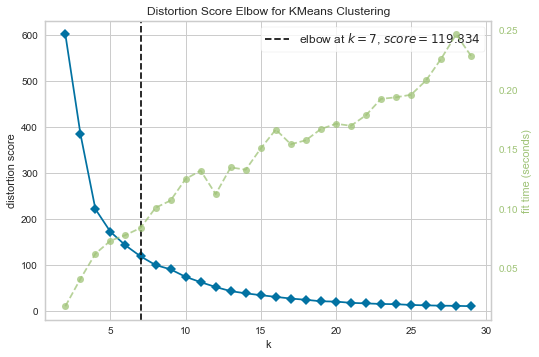

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Elbow Method for K means# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(scaled_data)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

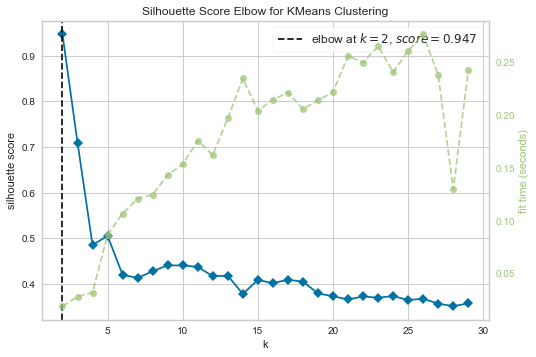

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [22]:
# Silhouette Score for K means# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(scaled_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure